---

# 1. Machine Learning with Python 2 (Project 2, Non-Linear Regression)

---

# Goal: Prediction of China's gdp via using the gdp between 1960 - 2014

---

# _00. Import Main Libraries_

# _01. Load the Data and Observe the Basics_

# _02. Select a Model to Fit_

# _03. Logist Func Def_

# _04. Scale and Fit the Data then Predict_

# _05. Some NonLinear Func Definitions_

# _06. Remember: Fitting Steps with curve_fit and Prediction_


---
---
---

# _00. Import Main Libraries_

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# _01. Load the Data and Observe the Basics_

In [11]:
# load the data

df = pd.read_csv("china_gdp.csv")

# we can also find it from the net

# !wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv

In [12]:
# observe some values

df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


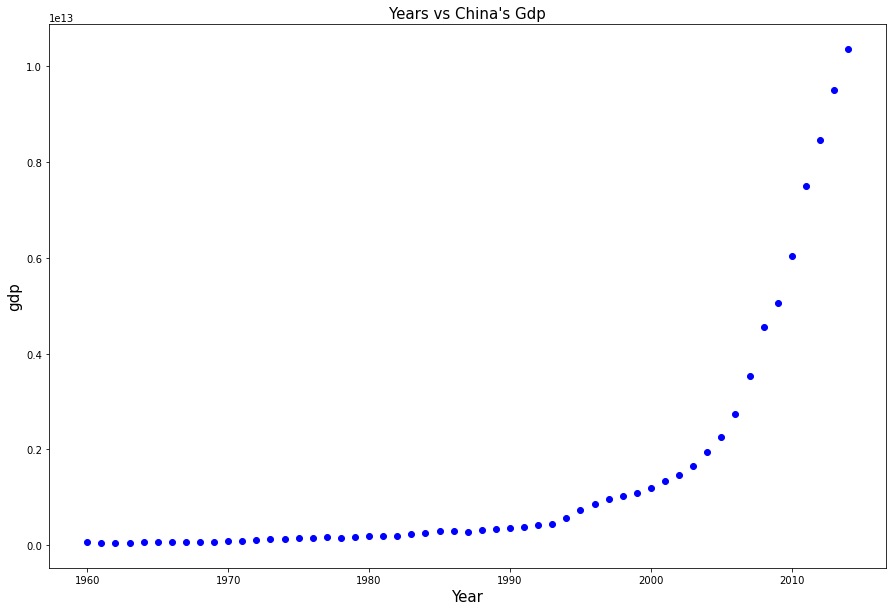

In [13]:
# plot for a better observation

width = 15
height = 10
plt.figure(figsize=(width, height))

plt.scatter(df.Year, df.Value,  color='blue')

plt.title("Years vs China's Gdp", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("gdp", fontsize = 15)

# plt.legend()
# plt.xlim(min(df.Year)-10,max(df.Year)+10)
# plt.ylim(min(df.Value)-100,max(df.Value)+100)
    
plt.show()

# _02. Select a Model to Fit_

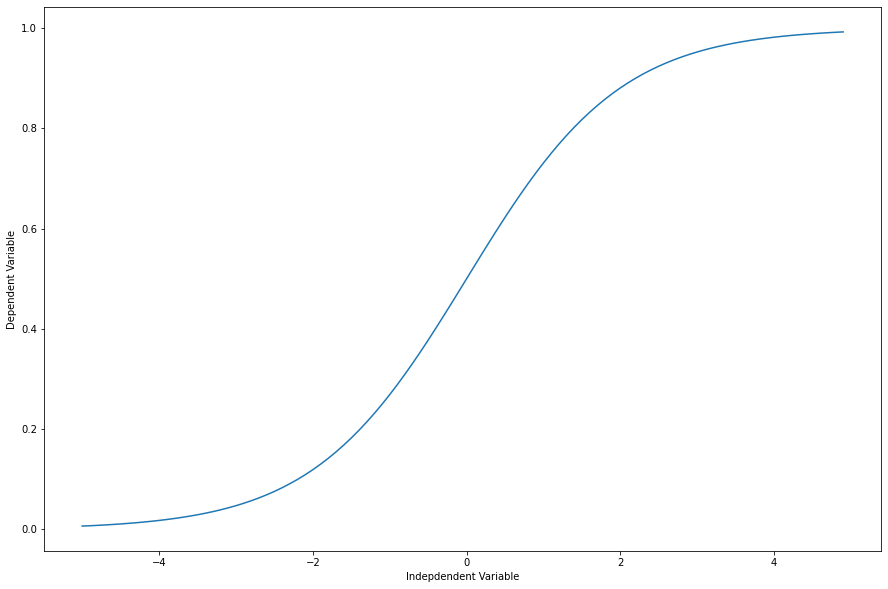

In [14]:
# a sigmoid (S-Shaped) function (logistic function)

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

width = 15
height = 10
plt.figure(figsize=(width, height))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.


# _03. Logist Func Def_

In [15]:
def sigmoid(x, Beta_1, Beta_2):
    
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     
    return y

# _04. Scale and Fit the Data then Predict_

In [16]:
# scaling the years between 0-1

from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()

scaler2 = MinMaxScaler()

x_norm = pd.DataFrame(scaler1.fit_transform(df[["Year"]]), columns = ["Year"])

y_norm = pd.DataFrame(scaler2.fit_transform(df[["Value"]]), columns = ["gdp"])


In [17]:
# fit the curve

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_norm.Year, y_norm.gdp)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 18.869350, beta_2 = 0.896663


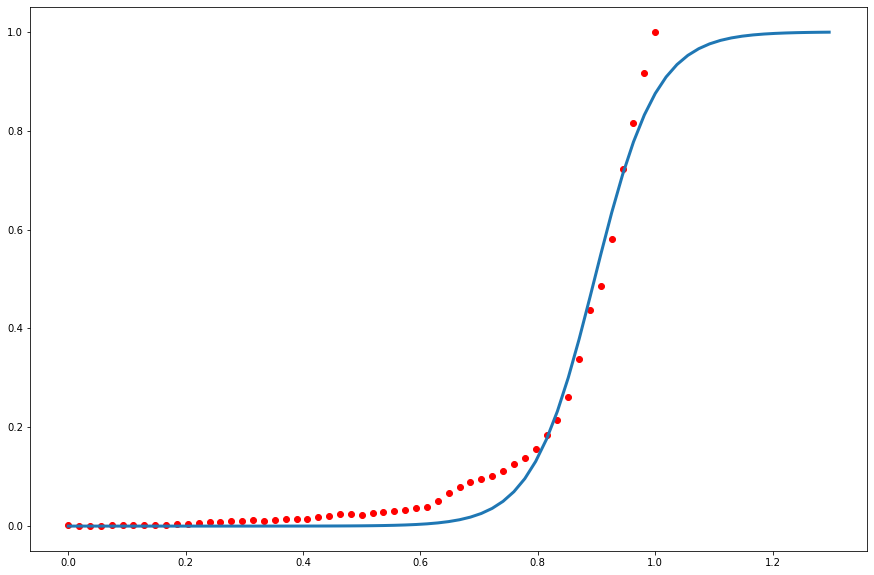

In [18]:
# predict and plot (normalized)

x_test = np.linspace(1960, 2030, 71)

x_test_norm = scaler1.transform(x_test.reshape(-1,1))

y_predicted_norm = sigmoid(x_test_norm, *popt)

plt.figure(figsize=(15,10))

plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x_test_norm, y_predicted_norm, linewidth=3.0, label='fit')
# plt.legend(loc='best')
# plt.ylabel('GDP')
# plt.xlabel('Year')
# plt.show()

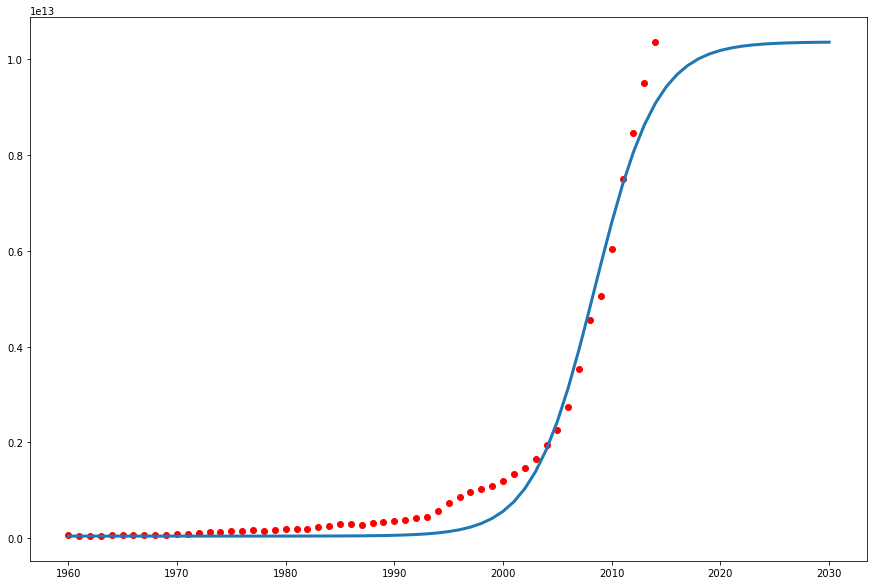

In [19]:
# inverse scale and plot

predDf = pd.DataFrame(x_test, columns = ["Year"])

predDf["gdp"] = scaler2.inverse_transform(y_predicted_norm)

plt.figure(figsize=(15,10))

plt.plot(df.Year, df.Value, 'ro', label='data')
plt.plot(x_test, predDf.gdp, linewidth=3.0, label='fit')

# plt.legend(loc='best')
# plt.ylabel('GDP')
# plt.xlabel('Year')
# plt.show()

In [20]:
# errors

# mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_norm, y_predicted_norm[0:55])

print(mae)

0.02725695974326379


In [26]:
# predictions 2014 - 2030

predDf[predDf["Year"]>2010]

,Year,gdp
51,2011.0,7.378647e+12
52,2012.0,8.061050e+12
53,2013.0,8.623924e+12
54,2014.0,9.070803e+12
55,2015.0,9.414951e+12
56,2016.0,9.673821e+12
57,2017.0,9.865118e+12
58,2018.0,1.000463e+13
59,2019.0,1.010541e+13
60,2020.0,1.017771e+13


# _05. Some NonLinear Func Definitions_

In [ ]:
# logistic (s-shaped)

def sigmoid(x, Beta_1, Beta_2):
    
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     
    return y

In [ ]:
# 3rd polynomial

def polynomial3(x, a, b, c, d):
    
    y = a*(x**3) + b*(x**2) + c*x + d
     
    return y

In [ ]:
def exponential(x, a, b):

    y = a*np.exp(x) + b
    
    return y

In [ ]:
def logarithmic(x, a, b, c):

    y = a*np.log(b*x) + c
    
    return y


# _06. Fitting Steps with curve_fit and Prediction_

In [ ]:
# # fitting the curves

# from scipy.optimize import curve_fit

# popt, pcov = curve_fit(logarithmic, x_norm.Year, y_norm.gdp)

# popt

In [ ]:
# # predict with the values found

# x = np.linspace(1960, 2030, 75)

# x_norm2 = scaler1.fit_transform(x.reshape(-1,1))

# y_norm2 = logarithmic(x_norm2, *popt)